<h1>05 Logistic Regression</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np

from seaborn import lmplot, stripplot

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

<h1>Introductory Remarks</h1>
<ul>
    <li>We're going to predict whether someone if over the drink-drive limit or not.</li>
    <li>This is classification, not regression.</li>
    <li>We have a dataset collected by some friends of mine. TBH it is too small to do anything reliable.</li>
    <li>We use logistic regression, not linear regression, and we measure accuracy, not mean absolute error.</li>
</ul>

<p>
    <strong>This notebook is incomplete. Your job is to complete it.</strong>
</p>

<h1>Read in and Check the Data</h1>

In [4]:
# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv("../datasets/dataset_alcohol.csv")

# Shuffle the dataset
df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)

In [9]:
features = ['age_yrs', 'height_cm', 'weight_kg', 'duration_mins', 'elapsed_mins', 'sex', 'last_meal', 'units']

<p>
    It's your job now to inspect the data. Determine whether there is any cleaning needed.
</p>

<h1>Create a Test Set</h1>

In [10]:
# Split off the test set: 20% of the dataset.
rest_of_df, test_df = train_test_split(df, train_size=0.8, stratify=df["over_limit"], random_state=2)

In [11]:
# Extract the features but leave as a DataFrame
rest_of_X = rest_of_df[features]
test_X = test_df[features]

# Target values, encoded and converted to a 1D numpy array
label_encoder = LabelEncoder()
label_encoder.fit(df["over_limit"])
rest_of_y = label_encoder.transform(rest_of_df["over_limit"])
test_y = label_encoder.transform(test_df["over_limit"])

<h1>Dataset Exploration</h1>

In [12]:
# It can be good to do this on a copy of the dataset (excluding the test set, of course)
copy_df = rest_of_df.copy()

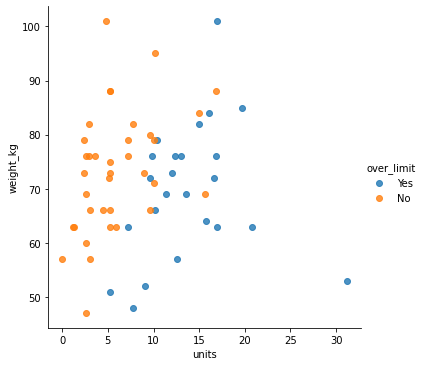

In [13]:
plot = lmplot(x="units", y="weight_kg", hue="over_limit", data=copy_df, fit_reg=False) 

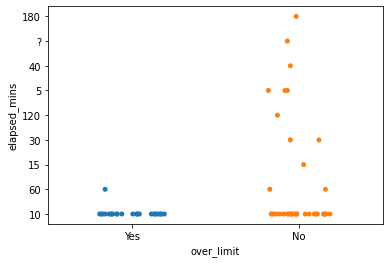

In [14]:
plot = stripplot("over_limit", "elapsed_mins", data=copy_df, jitter=0.2)

<p>
    It's your job to think about feature engineering. 
</p>

<h1>Model Selection</h1>

<p>
    It's your job to create any classes to insert new features.
</p>
<p>
    Then, write a preprocessor. You'll need to scale the numeric features. 
    And you'll need a one-hot encoder for the non-numeric features.
</p>
<p>
    Then try out logistic regression and kNN. Remember to user "accuracy" as the evaluation function.
</p>

<h1>Evaluate on the Test Set</h1>
<p>
    Once you've finished tweaking and tuning, then do error estimation (in fact, accuracy estimation)
    on the test set. Use accuracy_score from sklearn.metrics as the evaluation function.
</p>